In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_by_year = {year : pd.read_csv('data/marathon_results_{}.csv'.format(year)) for year in range(2009,2020)}

In [3]:
results_by_year[2019]

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,KEN,0:15:11,0:30:21,0:45:48,...,1:04:29,1:16:23,1:32:01,1:47:16,2:01:45,0:04:53,2:07:57,1,1,1
1,6,"Desisa, Lelisa",29,M,Ambo,NaN,ETH,0:15:10,0:30:22,0:45:46,...,1:04:30,1:16:24,1:32:01,1:47:16,2:01:46,0:04:53,2:07:59,2,2,2
2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,KEN,0:15:14,0:30:22,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:01:45,0:04:54,2:08:07,3,3,3
3,8,"Kandie, Felix",32,M,Iten,NaN,KEN,0:15:14,0:30:24,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:02:08,0:04:55,2:08:54,4,4,4
4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,KEN,0:15:12,0:30:21,0:45:46,...,1:04:28,1:16:23,1:32:01,1:47:16,2:01:57,0:04:56,2:08:55,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26651,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,2:17:35,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989
26652,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,3:27:50,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092
26653,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,3:21:04,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858
26654,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,3:20:47,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200


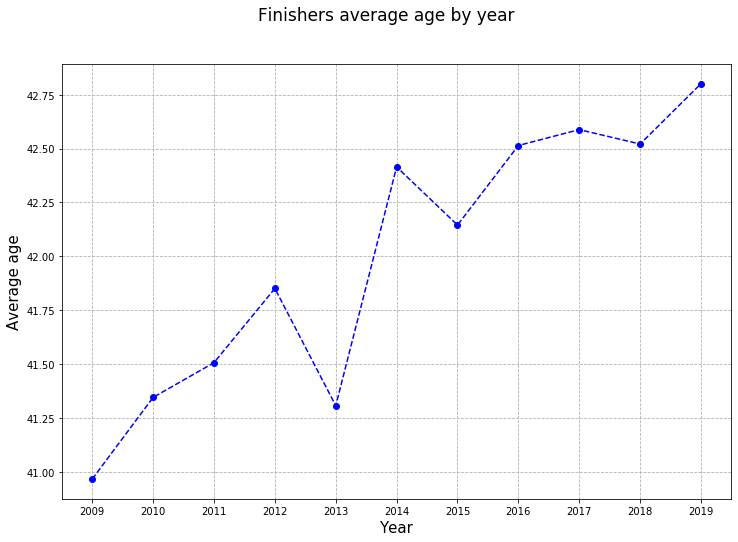

In [13]:
mean_ages = {year : results['Age'].mean() for year, results in results_by_year.items()}
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Finishers average age by year', fontsize=17)
ax.plot(list(mean_ages.keys()), list(mean_ages.values()), linestyle='--', marker='o', color='b')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Average age', fontsize=15)
ax.set_xticks(list(mean_ages.keys()))
ax.set_xticklabels(list(mean_ages.keys()))
plt.grid(linestyle='--')
plt.show()

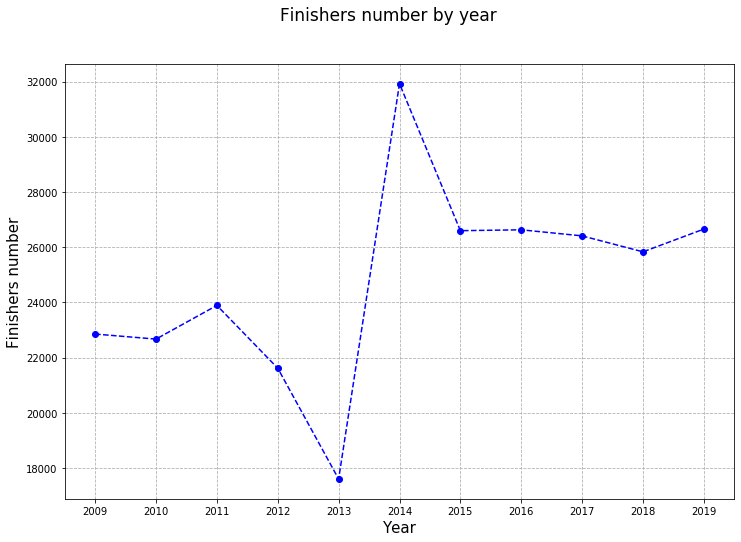

In [14]:
participants_number = {year : len(results) for year, results in results_by_year.items()}
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Finishers number by year', fontsize=17)
ax.plot(list(participants_number.keys()), list(participants_number.values()), linestyle='--', marker='o', color='b')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Finishers number', fontsize=15)
ax.set_xticks(list(participants_number.keys()))
ax.set_xticklabels(list(participants_number.keys()))
plt.grid(linestyle='--')
plt.show()

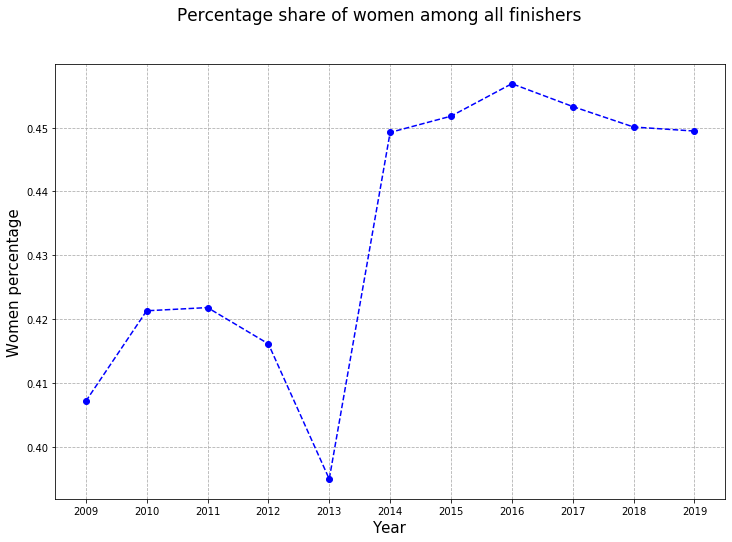

In [15]:
women_number = {year : len(results[results['M/F']=='F']) for year, results in results_by_year.items()}
women_percentage = {year : women/participants for (year, women), participants in zip (women_number.items(), participants_number.values())}
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Percentage share of women among all finishers', fontsize=17)
ax.plot(list(women_percentage.keys()), list(women_percentage.values()), linestyle='--', marker='o', color='b')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Women percentage', fontsize=15)
ax.set_xticks(list(women_percentage.keys()))
ax.set_xticklabels(list(women_percentage.keys()))
plt.grid(linestyle='--')
plt.show()

In [16]:
def timestamp_to_seconds(timestamp):
    split_time = timestamp.split(':')
    if len(split_time) !=3:
        split_time = timestamp.split('.')
    return int(split_time[0]) * 3600 + int(split_time[1]) * 60 + int(split_time[2])

def seconds_to_timestamp(seconds):
    seconds = int(round(float(seconds)))
    hh = seconds//3600
    mm = (seconds - hh * 3600)//60
    ss = seconds - hh * 3600 - mm * 60
    return '{}:{:02d}:{:02d}'.format(hh, mm, ss)

def get_mean_official_time(results):
    return int(round(results['Official Time'].map(timestamp_to_seconds).mean()))

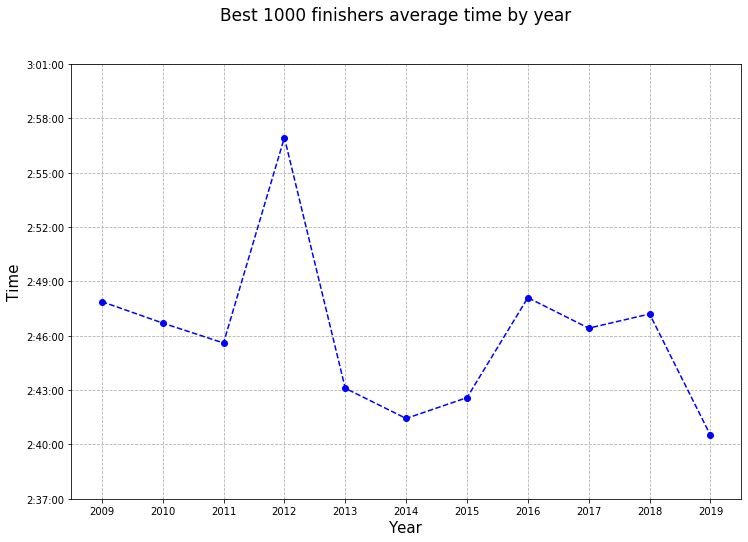

In [17]:
mean_times_best1000 = {year : get_mean_official_time(results.head(1000)) for year, results in results_by_year.items()}
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Best 1000 finishers average time by year', fontsize=17)
ax.plot(list(mean_times_best1000.keys()), list(mean_times_best1000.values()), linestyle='--', marker='o', color='b')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Time', fontsize=15)
ax.set_xticks(list(mean_times_best1000.keys()))
ax.set_xticklabels(list(mean_times_best1000.keys()))
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels_range = np.arange(60*round(int(y_labels[0])/60), int(y_labels[-1]) + 180, 180)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.grid(linestyle='--')
plt.show()

In [18]:
weather = pd.read_csv('data/weather.csv')
weather

,Year,Temperature(°F),Sky,Humidity(%)
0,2019,58,overcast,87
1,2018,43,heavy rain,89
2,2017,72,clear,37
3,2016,67,clear,28
4,2015,41,light rain,93
5,2014,50,clear,24
6,2013,48,mostly cloudy,48
7,2012,76,clear,46
8,2011,44,partly cloudy,43
9,2010,47,partly cloudy,50


In [9]:
best_1000_men_by_year = {year : results[results['M/F']=='M'] for year, results in results_by_year.items()}
best_1000_women_by_year = {year : results[results['M/F']=='F'] for year, results in results_by_year.items()}
mean_times_men = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_men_by_year.items()}
print(mean_times_men)
mean_times_women = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_women_by_year.items()}
print(mean_times_women)
women_to_men_time = {year : timestamp_to_seconds(women_time)/timestamp_to_seconds(men_time) for ((year, women_time), men_time) in zip (mean_times_women.items(), mean_times_men.values())}
women_to_men_time


{2009: '2:48:23', 2010: '2:47:26', 2011: '2:46:27', 2012: '2:57:42', 2013: '2:43:41', 2014: '2:42:06', 2015: '2:42:58', 2016: '2:48:33', 2017: '2:47:09', 2018: '2:47:21', 2019: '2:41:07'}
{2009: '3:17:41', 2010: '3:16:09', 2011: '3:14:30', 2012: '3:29:45', 2013: '3:11:20', 2014: '3:10:20', 2015: '3:09:22', 2016: '3:13:52', 2017: '3:14:09', 2018: '3:13:11', 2019: '3:08:17'}


{2009: 1.1740077204790655,
 2010: 1.1715110491738006,
 2011: 1.1685190747972365,
 2012: 1.1803601575689364,
 2013: 1.1689237348538846,
 2014: 1.1741723216121736,
 2015: 1.161996318265494,
 2016: 1.1502027093839613,
 2017: 1.161531558480407,
 2018: 1.1543670949108655,
 2019: 1.168614875349126}

In [10]:
countries_represented_by_year = {year : results['Country'].nunique() for year, results in results_by_year.items()}
countries_represented_by_year

{2009: 60,
 2010: 63,
 2011: 66,
 2012: 60,
 2013: 70,
 2014: 77,
 2015: 79,
 2016: 79,
 2017: 91,
 2018: 91,
 2019: 92}

In [11]:
states = pd.read_csv('data/states.csv')
states

,Postal abbreviation,State name,Avg temperature(°F),Avg elevation(m)
0,AK,Alaska,32.03,580
1,AL,Alabama,62.68,150
2,AR,Arkansas,60.09,200
3,AZ,Arizona,65.97,1250
4,CA,California,61.17,880
5,CO,Colorado,46.26,2070
6,CT,Connecticut,48.60,150
7,DE,Delaware,54.48,20
8,FL,Florida,71.80,30
9,GA,Georgia,62.30,180


In [12]:
usa_participants_by_year = {year : results[results['Country'] == 'USA'] for year, results in results_by_year.items()}
regions_represented_by_year = {year : participants.groupby('State').size() for year, participants in usa_participants_by_year.items()}
states_represented_by_year = {}
for year in range(2009, 2020):
    states_participants = {}
    for region, participants in regions_represented_by_year[year].items():
        if region in states['Postal abbreviation'].values:
            states_participants[region] = participants
    if states_participants:
        states_represented_by_year[year] = states_participants
states_represented_by_year

{2009: {'AK': 67,
  'AL': 69,
  'AR': 27,
  'AZ': 235,
  'CA': 1598,
  'CO': 431,
  'CT': 423,
  'DE': 64,
  'FL': 461,
  'GA': 297,
  'HI': 48,
  'IA': 134,
  'ID': 74,
  'IL': 649,
  'IN': 208,
  'KS': 129,
  'KY': 117,
  'LA': 51,
  'MA': 4719,
  'MD': 415,
  'ME': 160,
  'MI': 626,
  'MN': 367,
  'MO': 173,
  'MS': 24,
  'MT': 56,
  'NC': 340,
  'ND': 31,
  'NE': 80,
  'NH': 334,
  'NJ': 579,
  'NM': 59,
  'NV': 83,
  'NY': 1296,
  'OH': 677,
  'OK': 76,
  'OR': 246,
  'PA': 769,
  'RI': 148,
  'SC': 115,
  'SD': 18,
  'TN': 236,
  'TX': 763,
  'UT': 238,
  'VA': 579,
  'VT': 109,
  'WA': 395,
  'WI': 372,
  'WV': 42,
  'WY': 15},
 2010: {'AK': 58,
  'AL': 63,
  'AR': 39,
  'AZ': 182,
  'CA': 1496,
  'CO': 407,
  'CT': 368,
  'DE': 47,
  'FL': 504,
  'GA': 216,
  'HI': 33,
  'IA': 163,
  'ID': 76,
  'IL': 995,
  'IN': 238,
  'KS': 137,
  'KY': 114,
  'LA': 33,
  'MA': 4612,
  'MD': 429,
  'ME': 169,
  'MI': 641,
  'MN': 442,
  'MO': 188,
  'MS': 29,
  'MT': 52,
  'NC': 374,
  'ND':